<a href="https://colab.research.google.com/github/catastropiyush/coursework-notebooks/blob/main/jwave_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/ucl-bug/jwave.git

  Cloning https://github.com/ucl-bug/jwave.git to /tmp/pip-req-build-9ks33_dr
  Running command git clone --filter=blob:none --quiet https://github.com/ucl-bug/jwave.git /tmp/pip-req-build-9ks33_dr
  Resolved https://github.com/ucl-bug/jwave.git to commit 9d114ac6acade3c866e78a9984be47833119a9f9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.3 MB/s eta 0:00:00
  Created wheel for jwave: filename=jwave-0.2.1-py3-none-any.whl size=40389 sha256=4425808c95d27ae

In [8]:
from jax import jit
from jax import numpy as jnp

from jwave import FourierSeries
from jwave.acoustics.time_varying import simulate_wave_propagation
from jwave.geometry import Domain, Medium, TimeAxis
from jwave.utils import load_image_to_numpy

# Simulation parameters
N, dx = (256, 256), (0.1e-3, 0.1e-3)
domain = Domain(N, dx)
medium = Medium(domain=domain, sound_speed=1500.)
time_axis = TimeAxis.from_medium(medium, cfl=0.3, t_end=.8e-05)

# Initial pressure field
p0 = jnp.zeros(N).at[32,32].set(1.0)
p0 = FourierSeries(p0, domain)

# Compile and run the simulation
@jit
def solver(medium, p0):
  return simulate_wave_propagation(medium, time_axis, p0=p0)

pressure = solver(medium, p0)

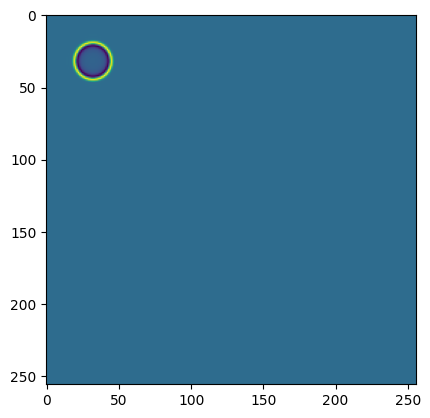

In [16]:
from matplotlib import pyplot as plt

#plt.imshow(pressure[-1].on_grid)
plt.imshow(pressure[40].on_grid)

In [18]:
pressure[-1].on_grid.block_until_ready()

Array([[[ 7.5504915e-12],
        [-2.3909643e-11],
        [-1.9303158e-11],
        ...,
        [ 3.7360870e-12],
        [-7.3467647e-12],
        [-2.3764250e-12]],

       [[ 2.2117820e-12],
        [-9.0813452e-13],
        [-4.6945746e-11],
        ...,
        [-1.0193073e-11],
        [-3.0409092e-11],
        [-5.1369033e-13]],

       [[-2.7439494e-12],
        [ 5.9510409e-12],
        [-8.5667556e-11],
        ...,
        [ 5.3899881e-11],
        [ 5.1593226e-12],
        [ 4.0948869e-11]],

       ...,

       [[ 1.0803030e-11],
        [ 2.1213404e-11],
        [ 1.1126460e-11],
        ...,
        [ 8.8663188e-11],
        [ 6.0388576e-11],
        [ 4.1293430e-11]],

       [[-1.2043952e-12],
        [-9.7717476e-12],
        [ 9.5572083e-12],
        ...,
        [-5.1373563e-12],
        [-1.4302909e-11],
        [-2.0361355e-11]],

       [[ 2.4416271e-11],
        [-1.9498843e-12],
        [ 1.9038561e-11],
        ...,
        [ 6.9223650e-12],
        [ 3.093

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.7 MB/s eta 0:00:00


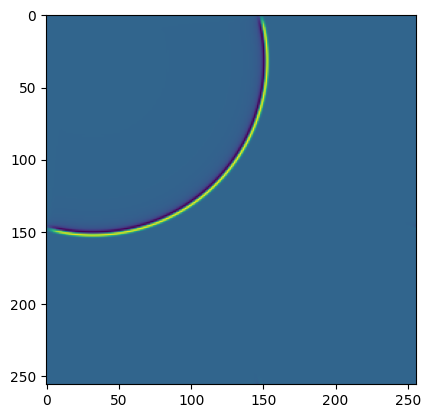

In [19]:
import jax.tools.colab_tpu
from jax import jit
from jax import numpy as jnp
from jwave import FourierSeries
from jwave.acoustics.time_varying import simulate_wave_propagation
from jwave.geometry import Domain, Medium, TimeAxis
from jwave.utils import load_image_to_numpy
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np
from IPython.display import HTML


# Simulation parameters
N, dx = (256, 256), (0.1e-3, 0.1e-3)
domain = Domain(N, dx)
medium = Medium(domain=domain, sound_speed=1500.)
time_axis = TimeAxis.from_medium(medium, cfl=0.3, t_end=.8e-05)

# Initial pressure field
p0 = jnp.zeros(N).at[32,32].set(1.0)
p0 = FourierSeries(p0, domain)

# Compile and run the simulation
@jit
def solver(medium, p0):
  return simulate_wave_propagation(medium, time_axis, p0=p0)

pressure = solver(medium, p0)

# Create the animation
fig, ax = plt.subplots()

# Get the number of time steps
num_time_steps = pressure.params.shape[0]

ims = []
for i in range(num_time_steps):
    # Access the data for the current time step and convert to numpy array
    frame_data = np.array(pressure.params[i])
    im = ax.imshow(frame_data, animated=True)
    if i == 0:
        ax.imshow(frame_data)  # show an initial frame
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# Display the animation in the notebook using HTML5 video
HTML(ani.to_html5_video())

In [5]:
%timeit solver(medium, p0)[-1].on_grid.block_until_ready()

2.17 s ± 348 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
